In [1]:
from numpy import dot

def kf_predict(X, P, A, Q, B, U):
    X = dot(A, X) + dot(B, U)
    P = dot(A, dot(P, A.T)) + Q
    return(X,P)

In [2]:
from numpy import dot, sum, tile, linalg
from numpy.linalg import inv ,det

def kf_update(X, P, Y, H, R):
    IM = dot(H, X)
    IS = R + dot(H, dot(P, H.T))
    K = dot(P, dot(H.T, inv(IS)))
    X = X + dot(K, (Y-IM))
    P = P - dot(K, dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X,P,K,IM,IS,LH)

def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1])- M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X-M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    return (P[0],E[0]) 

In [14]:
from numpy import *
from numpy.linalg import inv
from numpy.random import randn
import matplotlib.pyplot as plt
x=[]
y=[]
#time step of mobile movement
dt = 0.1

# Initialization of state matrices
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.01, 0.01, 0.01, 0.01))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,1]])
Q = eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1)) 

# Measurement matrices
Y = array([[X[0,0] + abs(randn(1)[0])], [X[1,0] + abs(randn(1)[0])]])
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])

# Number of iterations in Kalman Filter
N_iter = 50

# Applying the Kalman Filter
for i in arange(0, N_iter):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    x.append(i)
    y.append((X[0,0],Y[0,0]))
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y = array([[X[0,0] + abs(0.1 * randn(1)[0])],[X[1, 0] +abs(0.1 * randn(1)[0])]]) 
    

In [5]:
Y

array([[4.22927172],
       [4.07384625]])

In [6]:
X

array([[4.13334832],
       [4.00012818],
       [0.81266369],
       [0.67509236]])

In [7]:
X.shape

(4, 1)

In [8]:
eye(X.shape[0])


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [9]:
zeros((X.shape[0],1))



array([[0.],
       [0.],
       [0.],
       [0.]])

In [11]:
array([[X[0,0] + abs(0.1 * randn(1)[0])],[X[1, 0] +abs(0.1 * randn(1)[0])]]) 


array([[4.21297184],
       [4.11725332]])

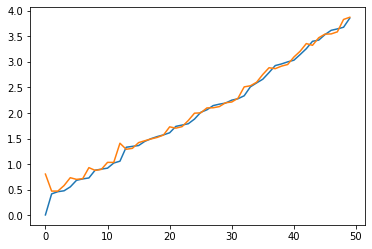

In [15]:
plt.plot(x,y)

In [4]:
import pandas as pd

In [31]:
df = pd.read_csv("ts_r_global.csv")

In [32]:
df.tail()

,Unnamed: 0,date,India_nan
48,87,2020-04-18,15722
49,88,2020-04-19,17615
50,89,2020-04-20,18539
51,90,2020-04-21,20080
52,91,2020-04-22,21370


In [37]:
from numpy import *
from numpy.linalg import inv
from numpy.random import randn
import matplotlib.pyplot as plt
x=[]
y=[]
#time step of mobile movement
dt = 1

# Initialization of state matrices
X = array([[0.0], [0.0], [0.1], [0.1]])
P = diag((0.1, 0.1, 0.1, 0.1))
A = array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0,1]])
Q = eye(X.shape[0])
B = eye(X.shape[0])
U = zeros((X.shape[0],1)) 

# Measurement matrices
Y = array([[df.iloc[0]["India_nan"]], [df.iloc[0]["India_nan"]]])
H = array([[1, 0, 0, 0], [0, 1, 0, 0]])
R = eye(Y.shape[0])

# Number of iterations in Kalman Filter
N_iter = 50

# Applying the Kalman Filter
for i in range(df.shape[0]-1):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    x.append(i)
    y.append((X[0,0],Y[0,0]))
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y =  array([[df.iloc[i+1]["India_nan"]], [df.iloc[i+1]["India_nan"]]])
    

In [35]:
for i in range(df.shape[0]-8,df.shape[0]-1):
    (X, P) = kf_predict(X, P, A, Q, B, U)
    x.append(x[-1]+1)
    y.append((X[0,0],df.iloc[i+1]["India_nan"]))
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    Y =  array([[X[0,0]], [X[0,0]]])

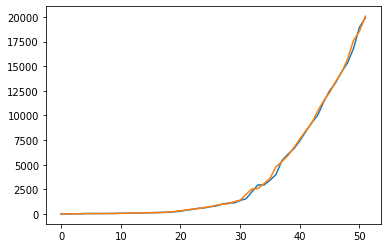

In [38]:
plt.plot(x,y)

In [49]:
Y

array([[21370],
       [21370]])

In [23]:
(X, P) = kf_predict(X, P, A, Q, B, U)

In [24]:
X

array([[3977.59974367],
       [3977.59974367],
       [ 266.2010968 ],
       [ 266.2010968 ]])

In [40]:
y

[(0.1, 3),
 (1.9136363636363636, 5),
 (5.348355663824604, 5),
 (6.103374012921751, 28),
 (34.27170431922444, 30),
 (39.19226015757763, 31),
 (37.43224363386098, 34),
 (38.135269543679385, 39),
 (42.734697625981546, 43),
 (46.953469212564414, 56),
 (62.20744196020487, 62),
 (69.7685137305066, 73),
 (81.51980993119884, 82),
 (91.21264301821842, 102),
 (113.929538224863, 113),
 (126.62460336664023, 119),
 (130.59914203745677, 142),
 (155.02178981847285, 156),
 (171.29150724193215, 194),
 (215.00503550646016, 244),
 (276.1233433927927, 330),
 (380.4309714055875, 396),
 (459.82702630923586, 499),
 (575.1561231677556, 536),
 (609.5836206762968, 657),
 (735.174039965935, 727),
 (811.6275537997777, 887),
 (988.5568336813409, 987),
 (1101.6049486382044, 1024),
 (1119.3975069557441, 1251),
 (1364.6735523262737, 1397),
 (1542.0043617838762, 1998),
 (2259.9939277903163, 2543),
 (2955.2645330004484, 2567),
 (2934.974157214454, 3082),
 (3416.667283481672, 3588),
 (3990.653457855943, 4778),
 (5403.23